# Titanic with TensorFlow

In [13]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
import tensorflow as tf
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report


In [14]:
# Random Seed
random_seed = 42 # set random seed for reproducibility
tf.random.set_seed(random_seed) # set random seed for TensorFlow
np.random.seed(random_seed) # set random seed for NumPy

## Data

In [15]:
df = pd.read_csv('mice_df_encoded_titanic.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,34.500000,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,1.0,3.0,47.000000,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,0.0,2.0,62.000000,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,0.0,3.0,27.000000,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,1.0,3.0,22.000000,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3.0,24.467036,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1.0,1.0,39.000000,0.0,0.0,108.9000,1.0,0.0,1.0,0.0,0.0
415,0.0,3.0,38.500000,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
416,0.0,3.0,24.467036,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [16]:
target_column='Survived'

In [17]:
df[target_column] = df[target_column].astype(int)

In [18]:
y_train = np.array(df[target_column]) # value dari label
df = df.drop(target_column, axis=1) # drop target
feature_list = list(df.columns) # list column
X_train = np.array(df) # df dalam bentuk numpy array

In [19]:
# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target=target_column, train_size=0.8, valid_size=0.1, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape)
# print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(334, 10) (334,)
(84, 10) (84,)


In [99]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

## Modeling

In [100]:
LEARNING_RATE = 2e-5
BATCH_SIZE = 16
EPOCHS = 50

In [1]:
tf.keras.backend.clear_session() # clean session
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
            #   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

NameError: name 'tf' is not defined

In [102]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_valid,y_valid),
                    epochs=EPOCHS,
                    callbacks=[
                        EarlyStopping(patience=5, restore_best_weights=True),
                        ModelCheckpoint("model/breast_neural.h5", save_best_only=True)
                    ],
                    batch_size=BATCH_SIZE
                    )

Epoch 1/50
35/35 [==============================] - 3s 27ms/step - loss: 0.6932 - accuracy: 0.6494 - val_loss: 0.6930 - val_accuracy: 0.7143
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.6494 - val_loss: 0.6929 - val_accuracy: 0.7143
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.6494 - val_loss: 0.6928 - val_accuracy: 0.7143
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.6494 - val_loss: 0.6927 - val_accuracy: 0.7143
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.6494 - val_loss: 0.6925 - val_accuracy: 0.7143
Epoch 6/50
35/35 [==============================] - 1s 15ms/step - loss: 0.6923 - accuracy: 0.6494 - val_loss: 0.6909 - val_accuracy: 0.7143
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.6898 - accuracy: 0.6494 - val_loss: 0.6881 - val_accuracy: 0.7143
Epoch 8/50
35/35 [

## Model Evaluation

In [103]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test Loss is {test_loss}')
print(f'Test Accuracy is {test_acc}')

3/3 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.9429
Test Loss is 0.2846809923648834
Test Accuracy is 0.9428571462631226


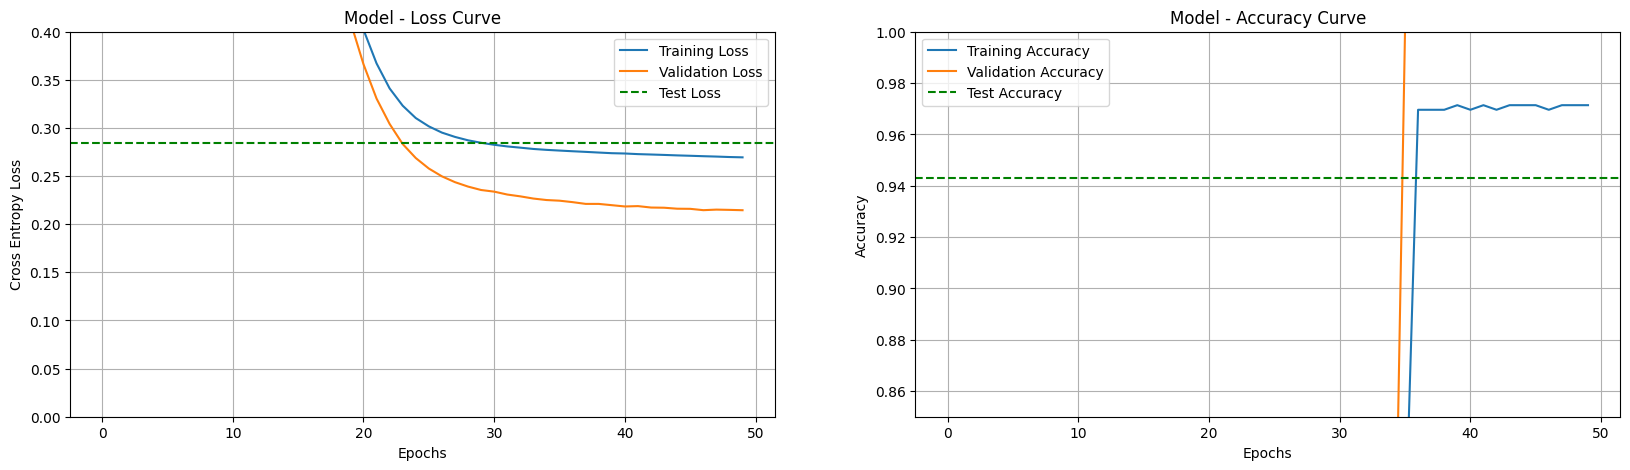

In [104]:
# Collect the history of the training run
history = pd.DataFrame(history.history)

# Create a figure to display the model's performance
plt.figure(figsize=(20, 5))

# Plot the loss curve in the first subplot
plt.subplot(1, 2, 1)
plt.title("Model - Loss Curve")
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")

# Horizontal line to show the testing performance
plt.axhline(y=test_loss, label="Test Loss", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.ylim([0, 0.4])

# Show the legend and grid
plt.legend()
plt.grid()

# Plot the accuracy curve in the second subplot
plt.subplot(1, 2, 2)
plt.title("Model - Accuracy Curve")
plt.plot(history['accuracy'], label="Training Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")

# Horizontal line to show the testing performance
plt.axhline(y=test_acc, label="Test Accuracy", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.85, 1])

# Show the legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [105]:
predict=model.predict(X_test)

y_pred=[]
for i in range(len(predict)):
    y_pred.append(0 if predict[i] < 0.5 else 1)

3/3 [==============================] - 0s 2ms/step


In [106]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.92      0.92      0.92        25

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70



3/3 [==============================] - 0s 2ms/step


Text(0.5, 36.72222222222221, 'Predicted label')

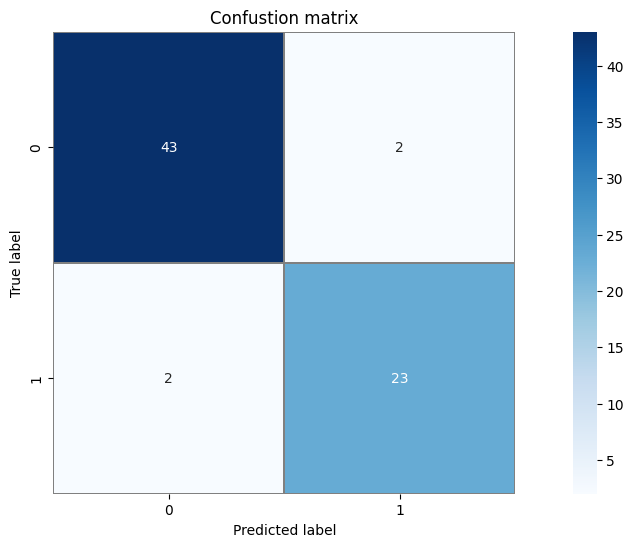

In [107]:
p_test = model.predict(X_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')